In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from electre_tri import *

## Discovering about the data

In [2]:
df = pd.read_csv("ourData.csv", index_col="index")
df.dropna(inplace=True)

In [9]:
df.head(3)

,url,product_name,categories,countries_fr,nutriscore_score,nutriscore_grade,food_groups_tags,image_url,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts_100g
index,,,,,,,,,,,,,,,
825939,http://world-fr.openfoodfacts.org/produit/1200...,Cranberry,"aliments et boissons à base de végétaux, boiss...",France,13.0,e,"en:beverages,en:sweetened-beverages",https://images.openfoodfacts.org/images/produc...,167.0,0.0,9.3,0.0,0.0,0.00,27.0
892227,http://world-fr.openfoodfacts.org/produit/2044...,8 galette de légumes,"aliments et boissons à base de végétaux, alime...",France,-2.0,a,"en:composite-foods,en:one-dish-meals",https://images.openfoodfacts.org/images/produc...,464.0,0.8,3.1,3.0,2.5,0.84,75.0
894012,http://world-fr.openfoodfacts.org/produit/2050...,Dessert glacé aux 3 chocolats (650 g / 900 ml),"desserts, surgelés, desserts glacés, glaces et...",France,14.0,d,"en:milk-and-dairy-products,en:ice-cream",https://images.openfoodfacts.org/images/produc...,1008.0,7.0,30.8,1.0,4.0,0.15,0.0


### Counts of Nutriscore Grades

/tmp/ipykernel_19483/2054918468.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nutriscore_grade', data=df, order=grade_counts.index, palette=category_colors)


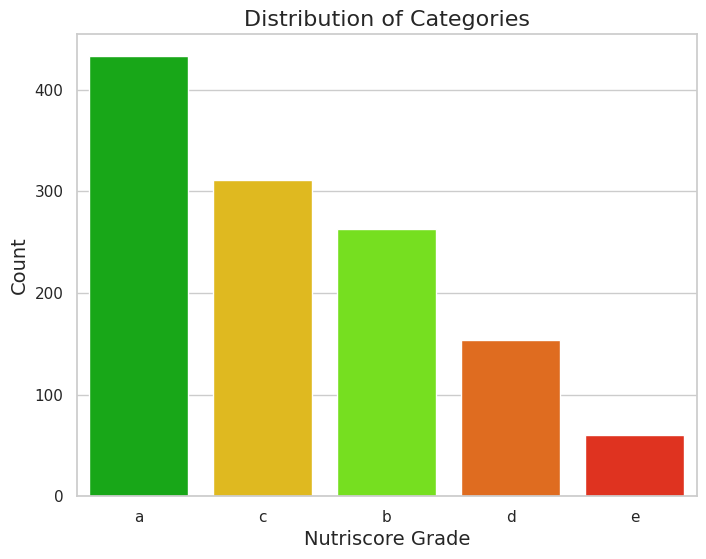

In [4]:
grade_counts = df['nutriscore_grade'].value_counts()
category_colors = {"a": "#00BF00", "b": "#73FF00", "c": "#FFCC00", "d": "#FF6600", "e": "#FF1900"}

sns.set(style='whitegrid')

plt.figure(figsize=(8,6))

sns.countplot(x='nutriscore_grade', data=df, order=grade_counts.index, palette=category_colors)

plt.xlabel('Nutriscore Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Categories', fontsize=16)

plt.show()

### Distribution of Nutriscore grade

In [16]:
df.columns

Index(['url', 'product_name', 'categories', 'countries_fr', 'nutriscore_score',
       'nutriscore_grade', 'food_groups_tags', 'image_url', 'energy_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'fruits-vegetables-nuts_100g'],
      dtype='object')

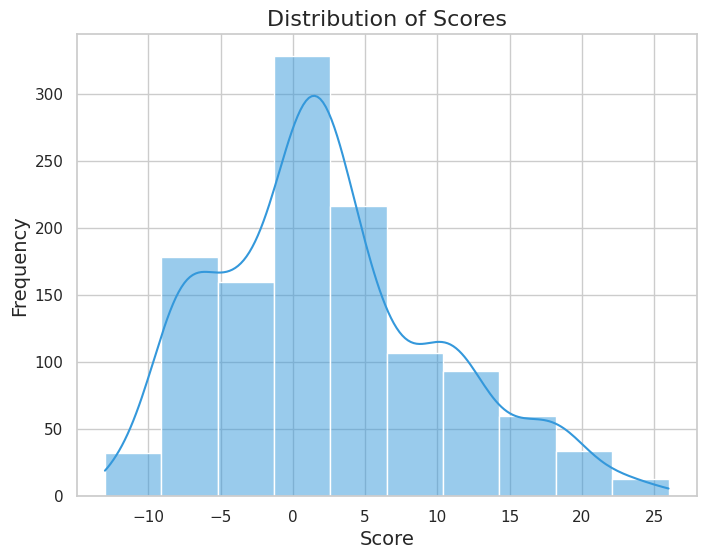

In [17]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot a histogram for the 'score' column
plt.figure(figsize=(8, 6))  # Set the figure size

# Customize the histogram appearance
sns.histplot(df['nutriscore_score'], bins=10, kde=True, color='#3498db')  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Scores', fontsize=16)

# Show the plot
plt.show()


## Electre-tri method

### Setting limiting profiles

#### Using min/max values of criteria as the basis

In [25]:
df.columns

Index(['url', 'product_name', 'categories', 'countries_fr', 'nutriscore_score',
       'nutriscore_grade', 'food_groups_tags', 'image_url', 'energy_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'fruits-vegetables-nuts_100g'],
      dtype='object')

In [9]:
agg_dict = {'energy_100g': ['max', 'min'],
            'saturated-fat_100g': ['max', 'min'],
            'sugars_100g': ['max', 'min'],
            'fiber_100g': ['max', 'min'],
            'proteins_100g': ['max', 'min'],
            'salt_100g': ['max', 'min'],
            'fruits-vegetables-nuts_100g': ['max', 'min']}
category_colors = {"a": "#00BF00", "b": "#73FF00", "c": "#FFCC00", "d": "#FF6600", "e": "#FF1900"}

result = df.groupby('nutriscore_grade').agg(agg_dict)

In [29]:
result

energy_100g        saturated-fat_100g      sugars_100g       \
                         max    min                max  min         max  min   
nutriscore_grade                                                               
a                     1636.0   51.0                3.0  0.0       27.00  0.0   
b                     2216.0   49.0                6.9  0.0       47.40  0.0   
c                     3766.0   34.0                9.5  0.0       33.02  0.0   
d                     2590.0  119.0               36.0  0.0       97.00  0.0   
e                     3024.0  128.0               23.0  0.0       44.00  0.0   

                 fiber_100g      proteins_100g      salt_100g       \
                        max  min           max  min       max  min   
nutriscore_grade                                                     
a                      23.0  0.0          28.0  0.0       1.2  0.0   
b                       6.5  0.0          23.0  0.0       1.4  0.0   
c                       7.0  0.0          21.0  0.0       4.0  0.0   
d                       5.2  0.0          25.0  0.0       3.1  0.0   
e                      32.0  0.0          24.0  0.0       1.6  0.0   

                 fruits-vegetables-nuts_100g       
                                         max  min  
nutriscore_grade                                   
a                                      100.0  0.0  
b                                      100.0  0.0  
c                                      100.0  0.0  
d                                       70.0  0.0  
e                                      100.0  0.0

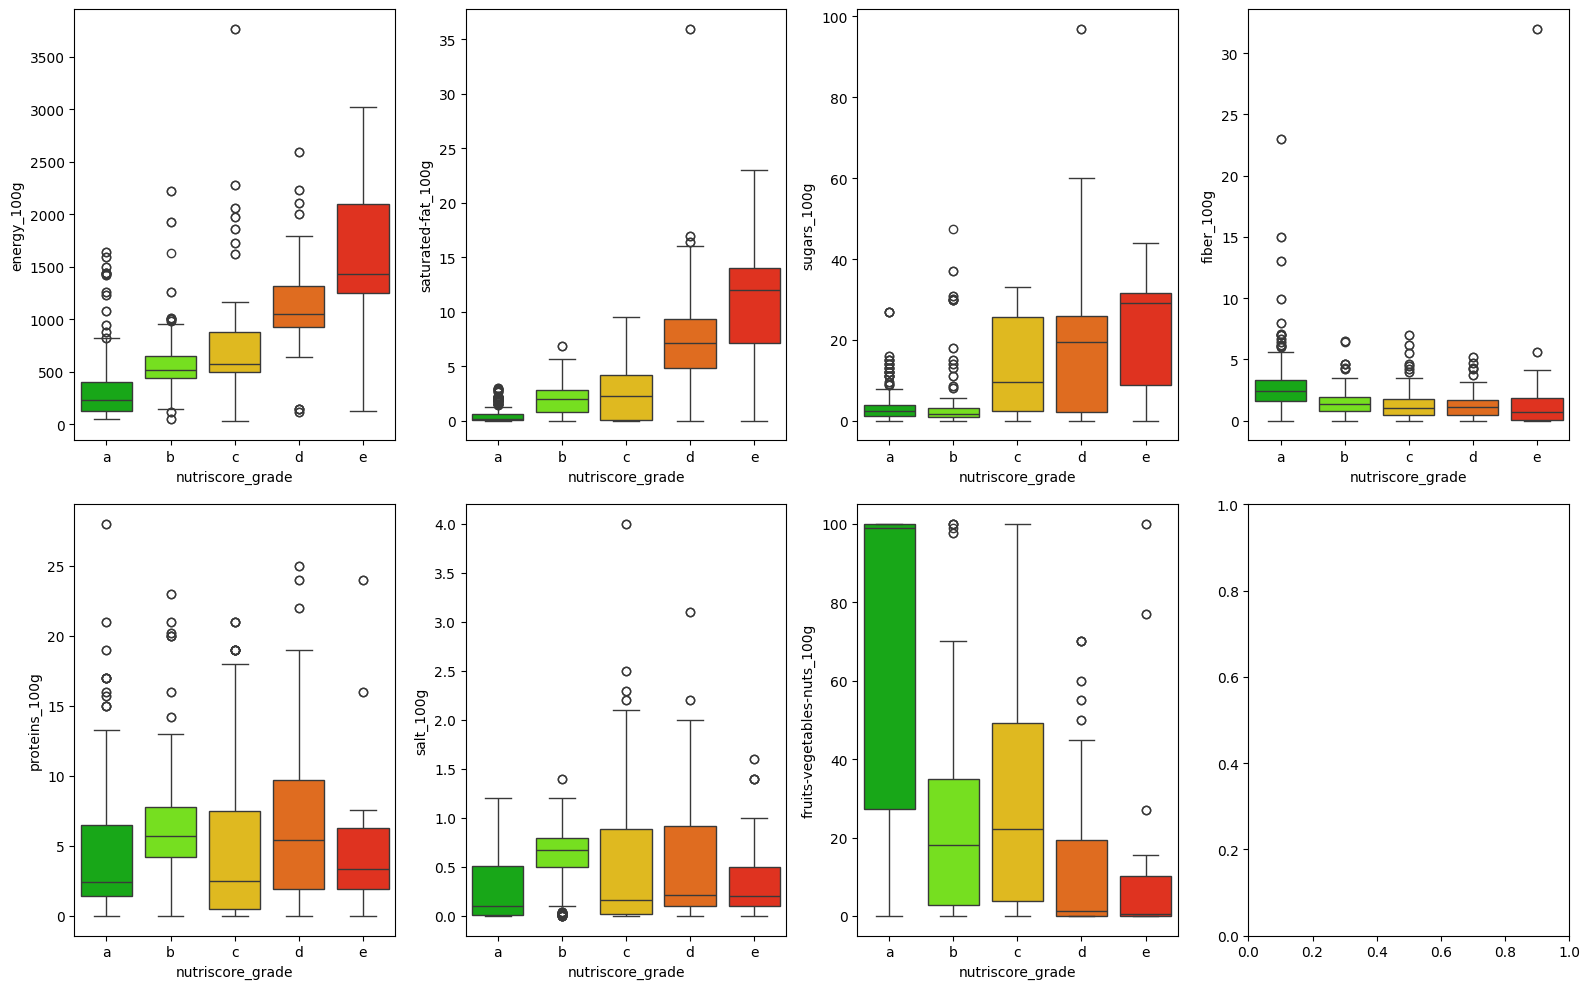

In [10]:
# Find borders for energy
columns = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g',
           'proteins_100g', 'salt_100g', 'fruits-vegetables-nuts_100g']
labels = df['nutriscore_grade']

# Plotting box plots for each of the criterias
# Create a 2x4 subplot grid
fig, axes = plt.subplots(2,4, figsize=(16,10))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.boxplot(x = 'nutriscore_grade', y=column, data=df, order=["a","b","c","d","e"], palette=category_colors, hue = 'nutriscore_grade', legend=False, ax=axes[i])
    # axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

#### Using the quartiles of criteria as the basis

In [14]:
for grade in ['a','b','c','d','e']:
    print(grade)
    print(df.loc[df['nutriscore_grade'] == grade]['energy_100g'].quantile([0.25, 0.5, 0.75]))

a
0.25    128.0
0.50    235.0
0.75    406.0
Name: energy_100g, dtype: float64
b
0.25    441.5
0.50    520.0
0.75    651.0
Name: energy_100g, dtype: float64
c
0.25    501.0
0.50    570.0
0.75    878.5
Name: energy_100g, dtype: float64
d
0.25     924.25
0.50    1054.50
0.75    1313.00
Name: energy_100g, dtype: float64
e
0.25    1248.00
0.50    1431.00
0.75    2100.75
Name: energy_100g, dtype: float64


#### Using AUC under ROC as the basis

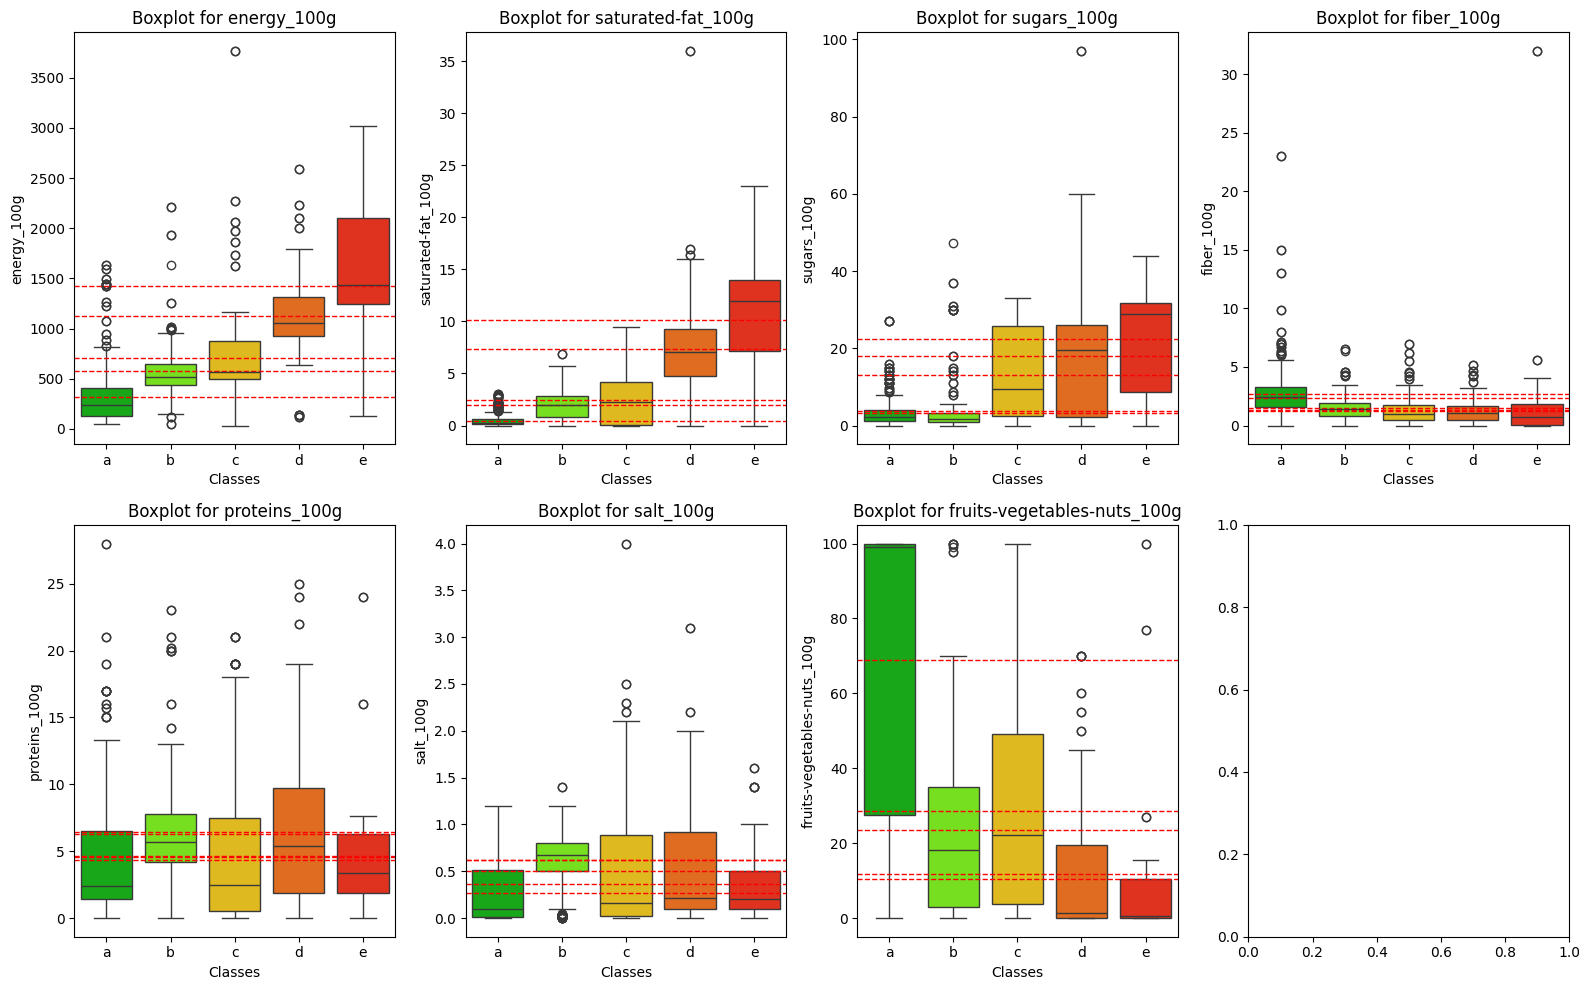

In [11]:
# Find borders for energy
columns = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g',
           'proteins_100g', 'salt_100g', 'fruits-vegetables-nuts_100g']
labels = df['nutriscore_grade']

# Create a 2x4 subplot grid
fig, axes = plt.subplots(2,4, figsize=(16,10))
axes = axes.flatten()

thresholds = {}

for i, column in enumerate(columns):
    data = df[column]

    # Find optimal thresholds
    optimal_threshold = find_optimal_threshold(data, labels)
    thresholds[column] = optimal_threshold

    # Plot boxplot
    sns.boxplot(x='nutriscore_grade', y=column, data=df, order=["a", "b", "c", "d", "e"], palette=category_colors, hue = 'nutriscore_grade', legend=False, ax=axes[i])

    for line in optimal_threshold:
        # Plot decision boundary
        axes[i].axhline(y=line, color='red', linestyle='dashed', linewidth=1)

    axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_xlabel('Classes')
    axes[i].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

### Executing Electre-tri

#### Plotting for Different Values of Lmd

In [3]:
metrics = {}
metrics['accuracy'] = {}
metrics['precision'] = {}
metrics['recall'] = {}
labels = ['a','b','c','d','e']

In [13]:
for lmd in [round(0.1*y,2) for y in range(1,10)]:
    df = PessimisticmajoritySorting(df, lmd)
    df = OptimisticmajoritySorting(df, lmd)

In [10]:
df.columns

Index(['url', 'product_name', 'categories', 'countries_fr', 'nutriscore_score',
       'nutriscore_grade', 'food_groups_tags', 'image_url', 'energy_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'fruits-vegetables-nuts_100g', 'pessim_electre_lmd=0.5',
       'optim_electre_lmd=0.5', 'pessim_electre_lmd=0.6',
       'optim_electre_lmd=0.6', 'pessim_electre_lmd=0.7',
       'optim_electre_lmd=0.7', 'pessim_electre_lmd=0.1',
       'optim_electre_lmd=0.1', 'pessim_electre_lmd=0.2',
       'optim_electre_lmd=0.2', 'pessim_electre_lmd=0.30000000000000004',
       'optim_electre_lmd=0.30000000000000004', 'pessim_electre_lmd=0.4',
       'optim_electre_lmd=0.4', 'pessim_electre_lmd=0.6000000000000001',
       'optim_electre_lmd=0.6000000000000001',
       'pessim_electre_lmd=0.7000000000000001',
       'optim_electre_lmd=0.7000000000000001', 'pessim_electre_lmd=0.8',
       'optim_electre_lmd=0.8', 'pessim_electre_lmd=0.9',
       'optim_

In [14]:
y_true = 'nutriscore_grade'
ys_pred = ['optim_electre_lmd='+str(round(x,1)) for x in [0.1*y for y in range(1,10)]]
ys_pred.extend(['pessim_electre_lmd='+str(round(x,1)) for x in [0.1*y for y in range(1,10)]])
for y_pred in ys_pred:
    metrics['accuracy'][y_pred] = round(accuracy_score(df[y_true], df[y_pred]),3)

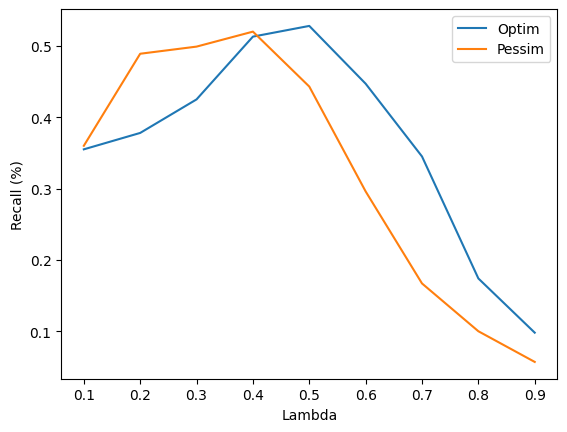

In [15]:
# Separate the data into 'optim' and 'pessim'
data = metrics['accuracy']
optim_data = {key: value for key, value in data.items() if 'optim' in key}
pessim_data = {key: value for key, value in data.items() if 'pessim' in key}

# Sort the data based on the 'lmd' values
sorted_optim_data = sorted(optim_data.items(), key=lambda x: float(x[0].split('=')[1]))
sorted_optim_data = [(float(key[-3:]),value) for (key, value) in sorted_optim_data]

sorted_pessim_data = sorted(pessim_data.items(), key=lambda x: float(x[0].split('=')[1]))
sorted_pessim_data = [(float(key[-3:]),value) for (key, value) in sorted_pessim_data]

# Extract x and y values for plotting
x_optim, y_optim = zip(*sorted_optim_data)
x_pessim, y_pessim = zip(*sorted_pessim_data)

# Plot the data
plt.plot(x_optim, y_optim, label='Optim')
plt.plot(x_pessim, y_pessim, label='Pessim')

# Add labels and legend
plt.xlabel('Lambda')
plt.ylabel('Recall (%)')
plt.legend()

# Show the plot
plt.show()

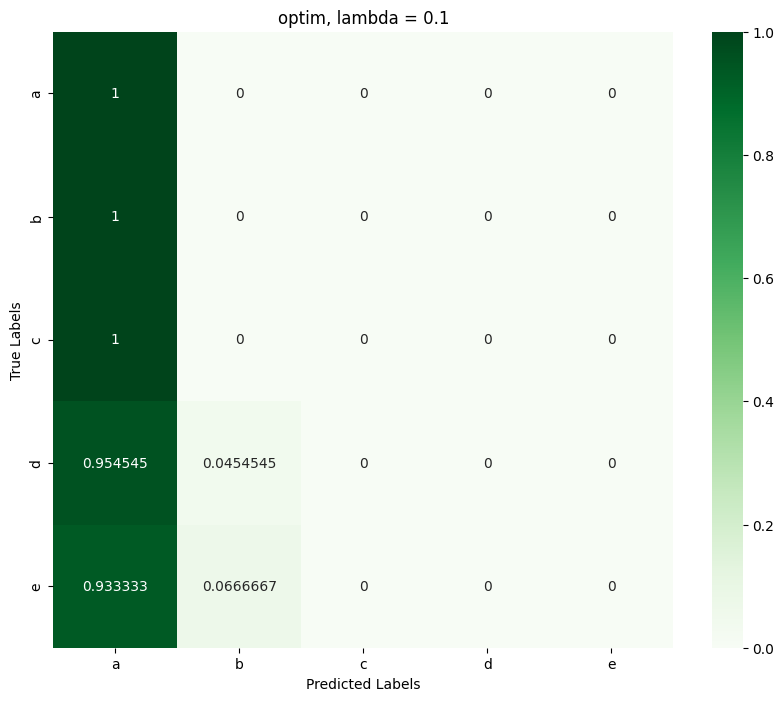

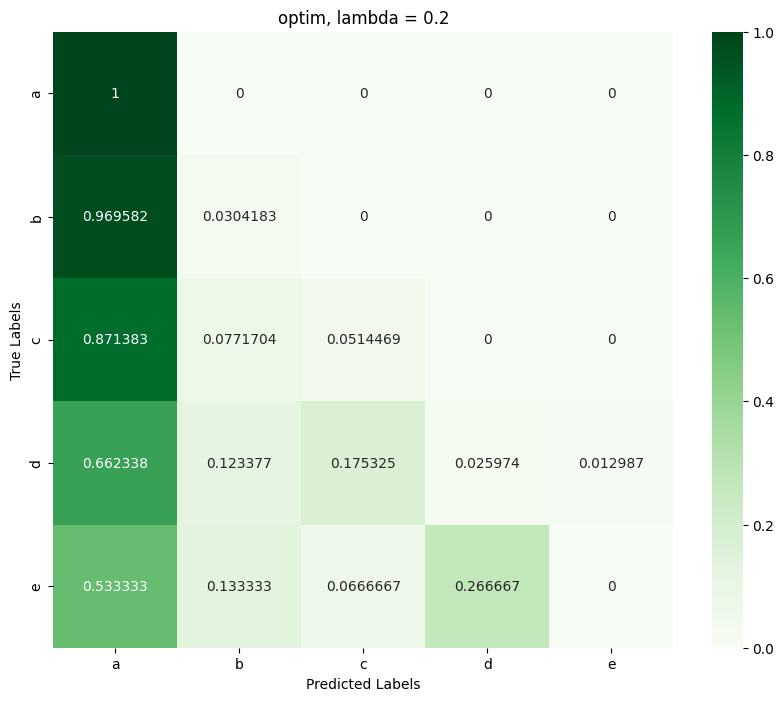

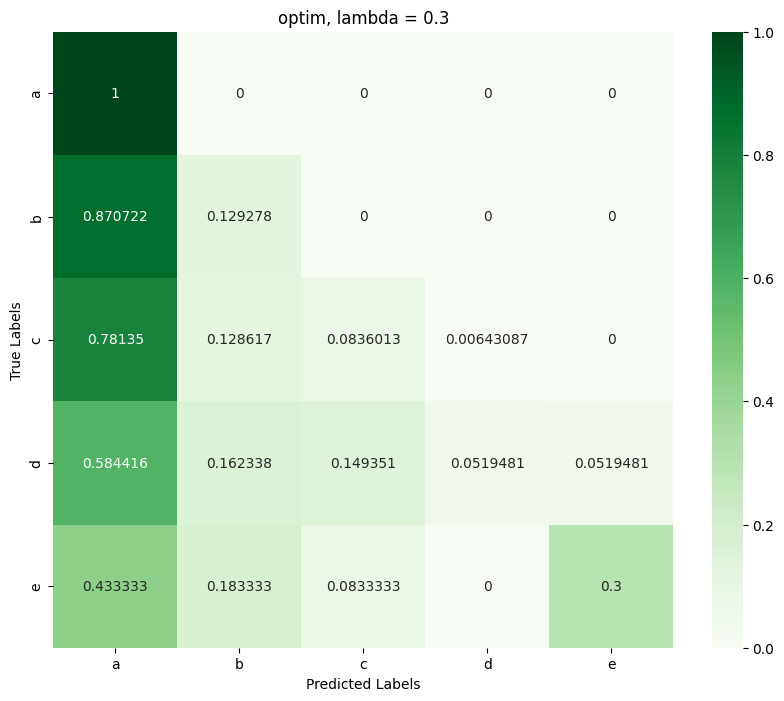

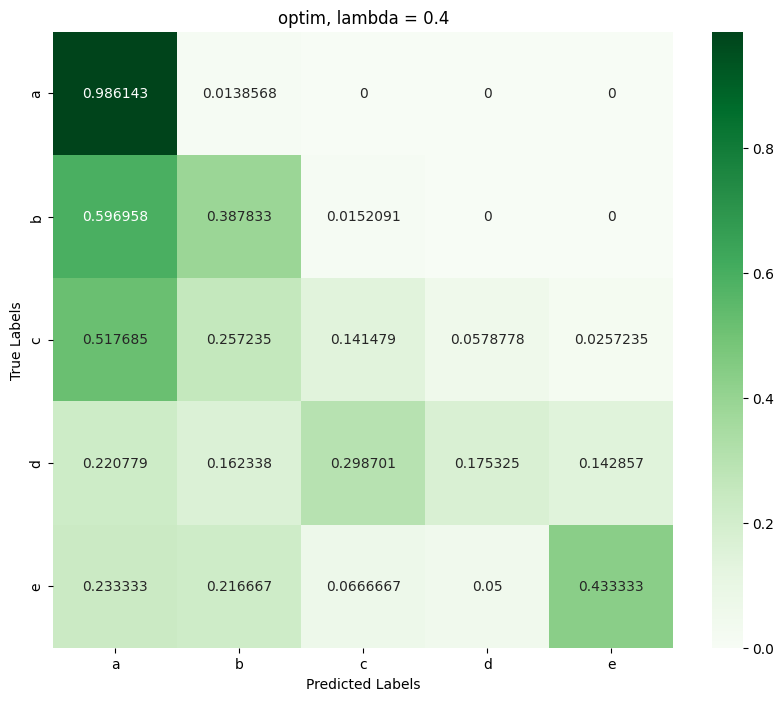

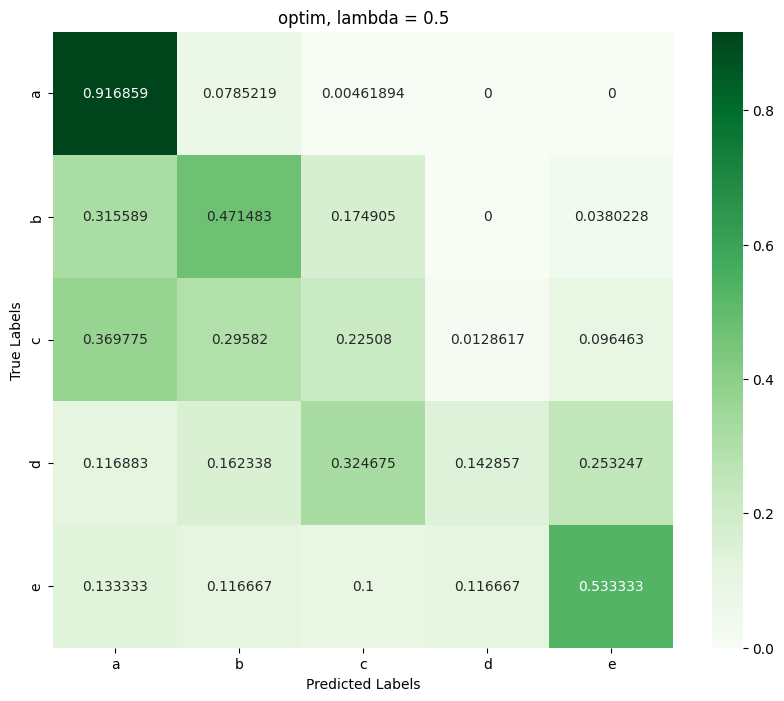

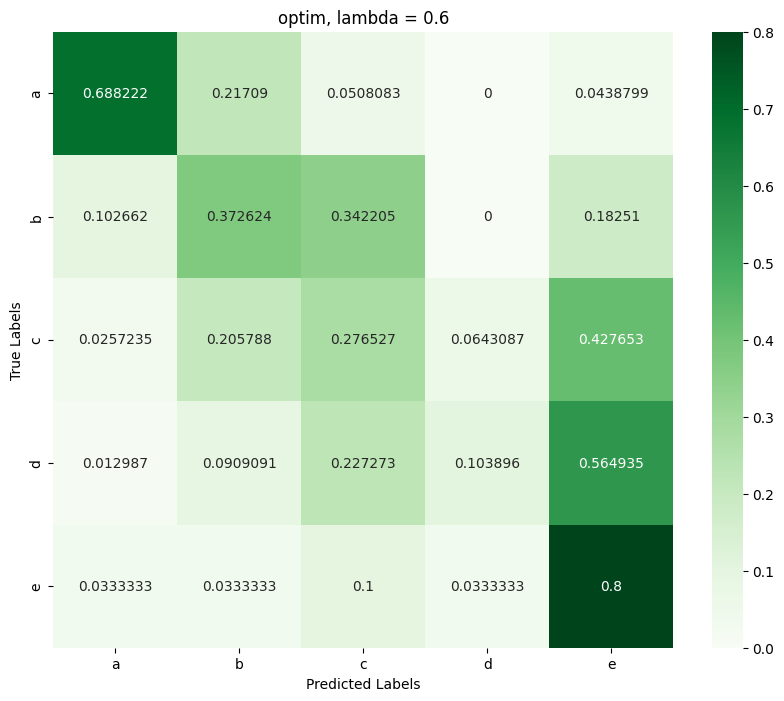

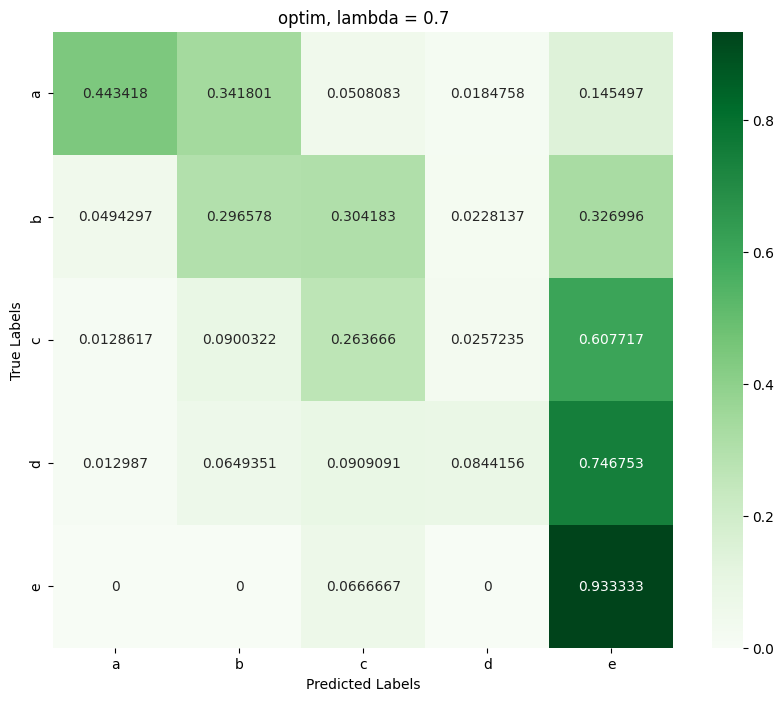

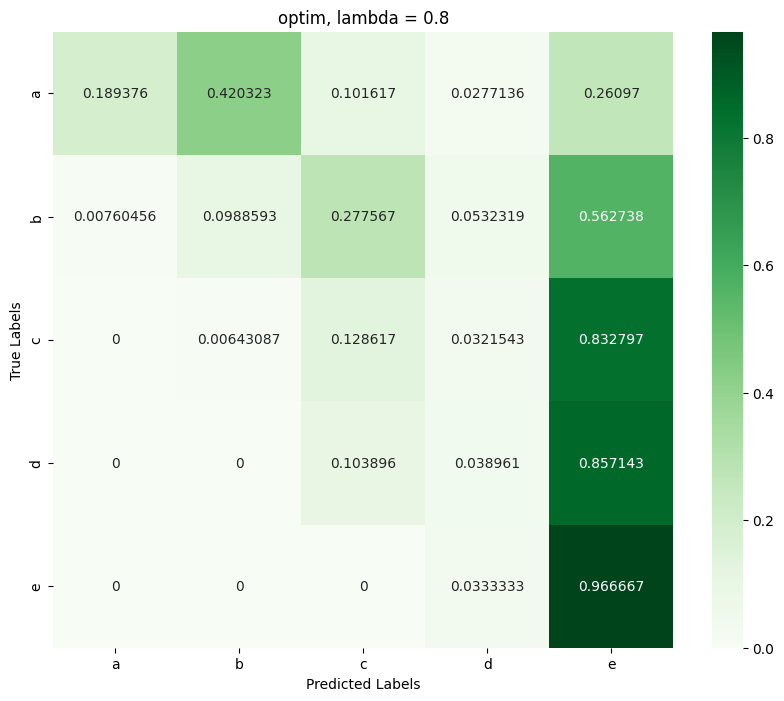

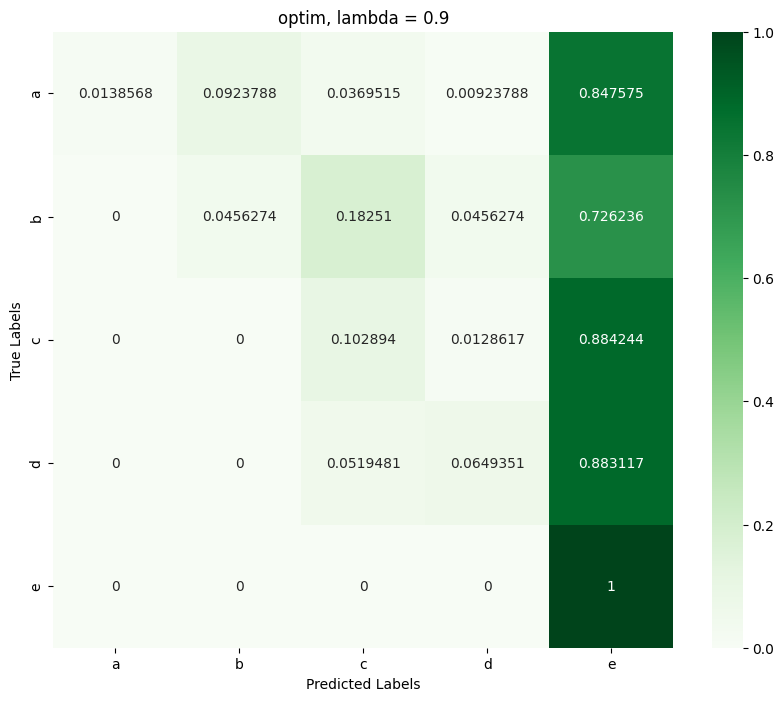

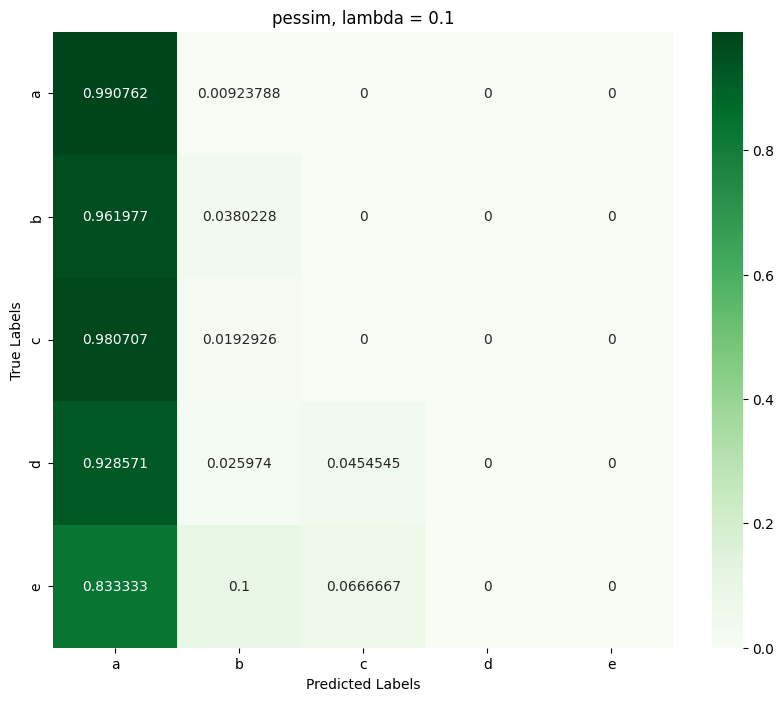

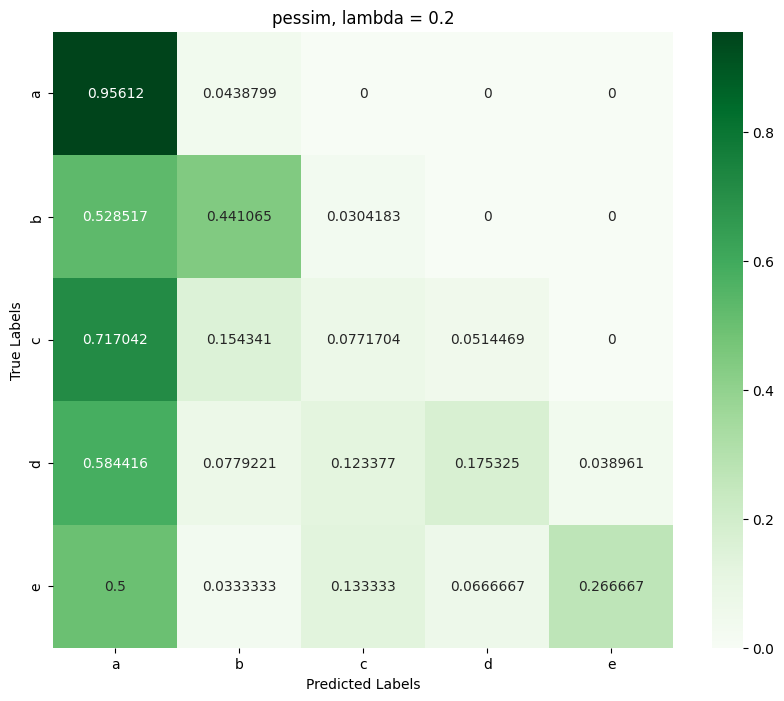

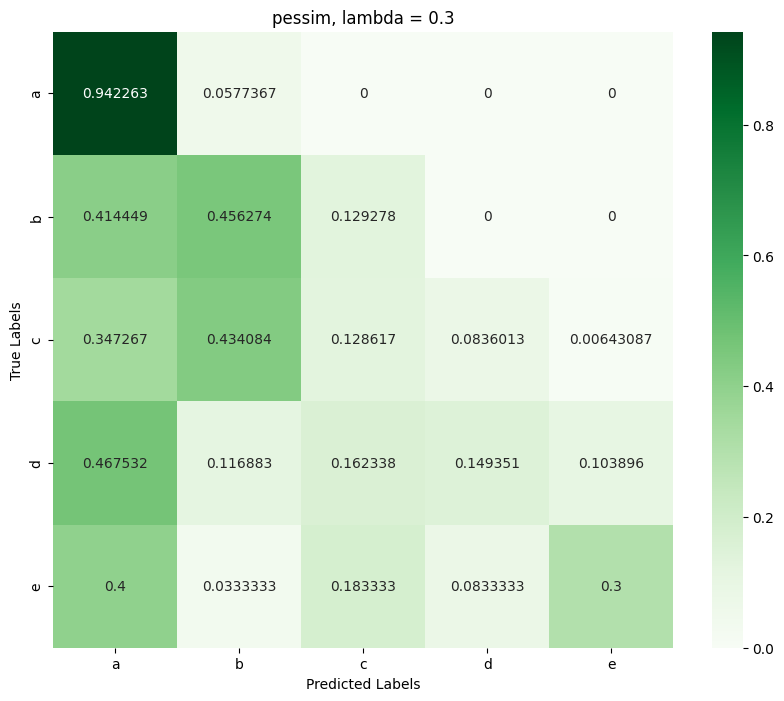

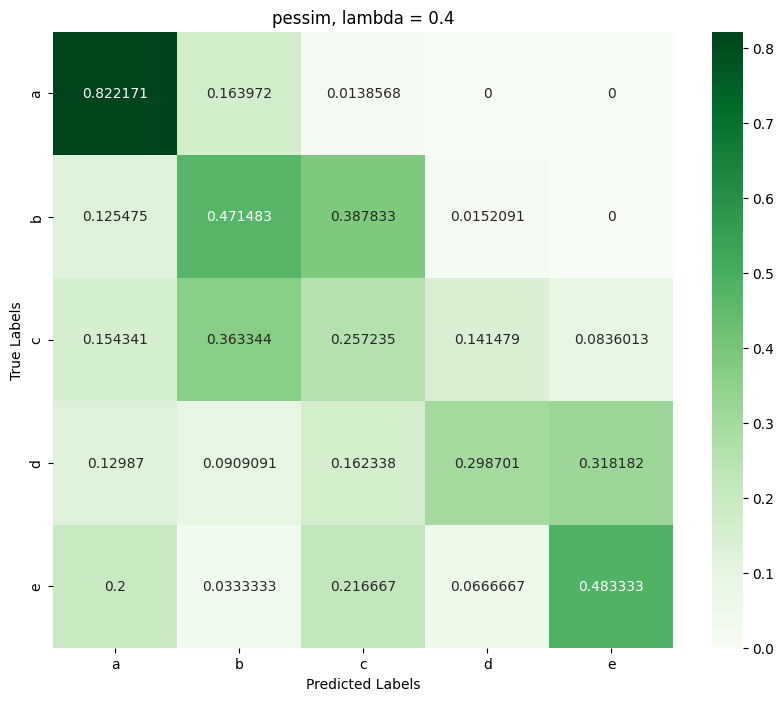

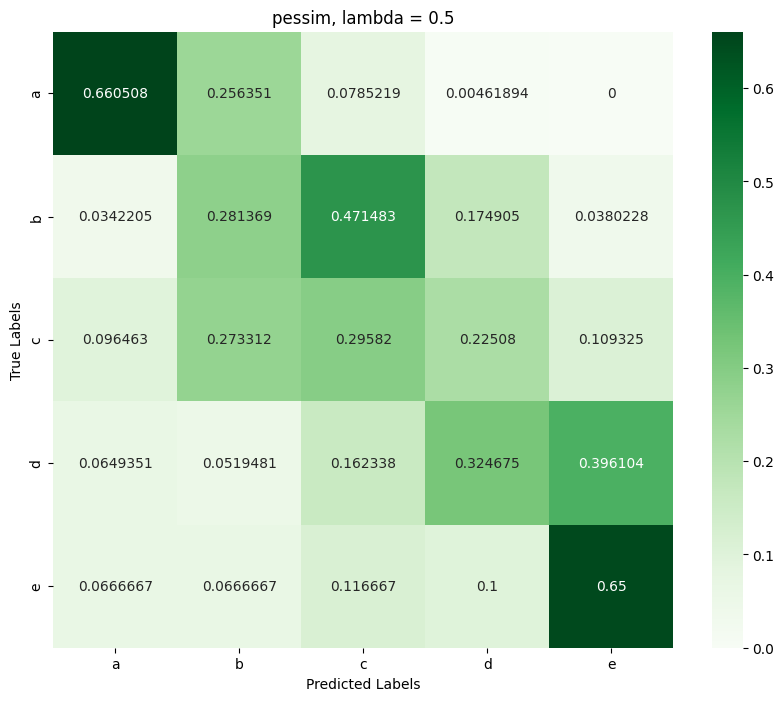

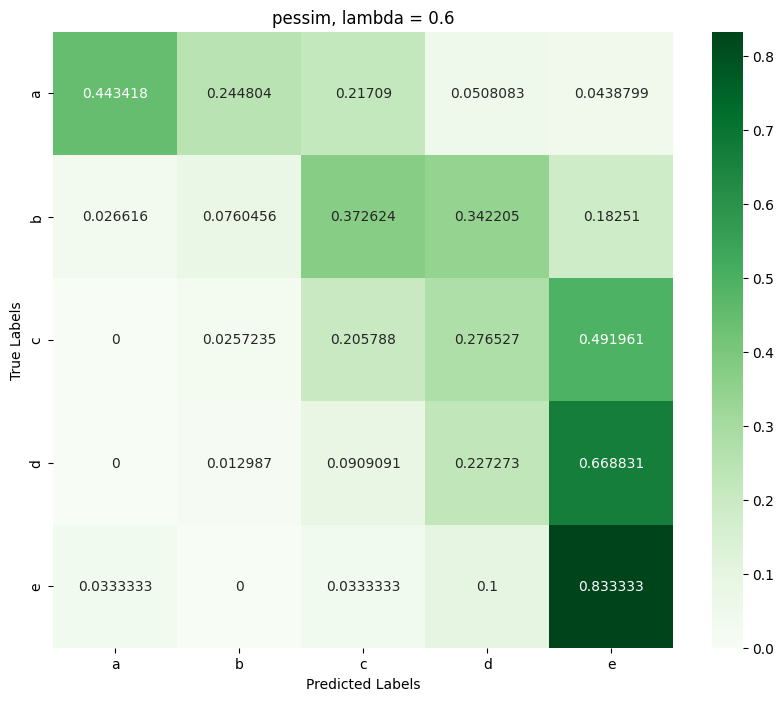

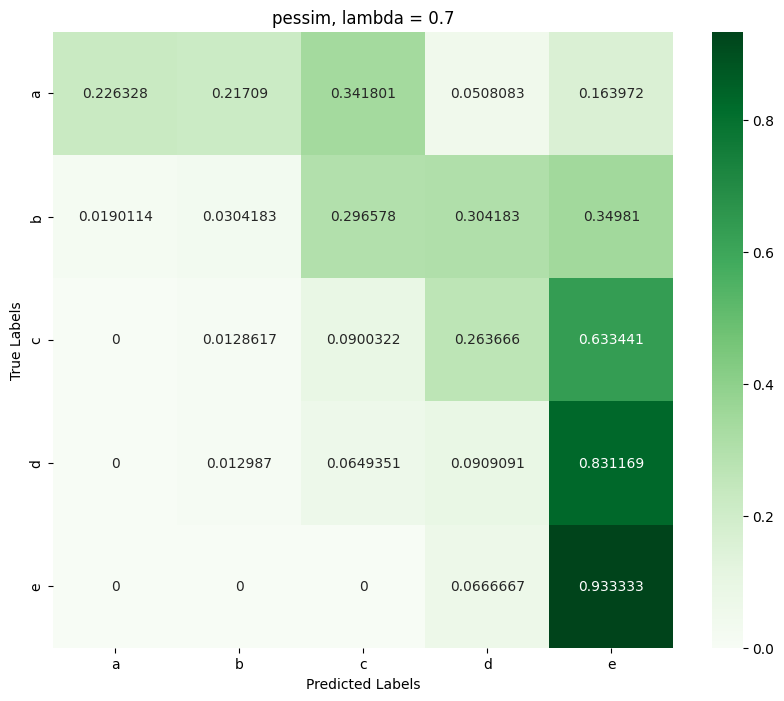

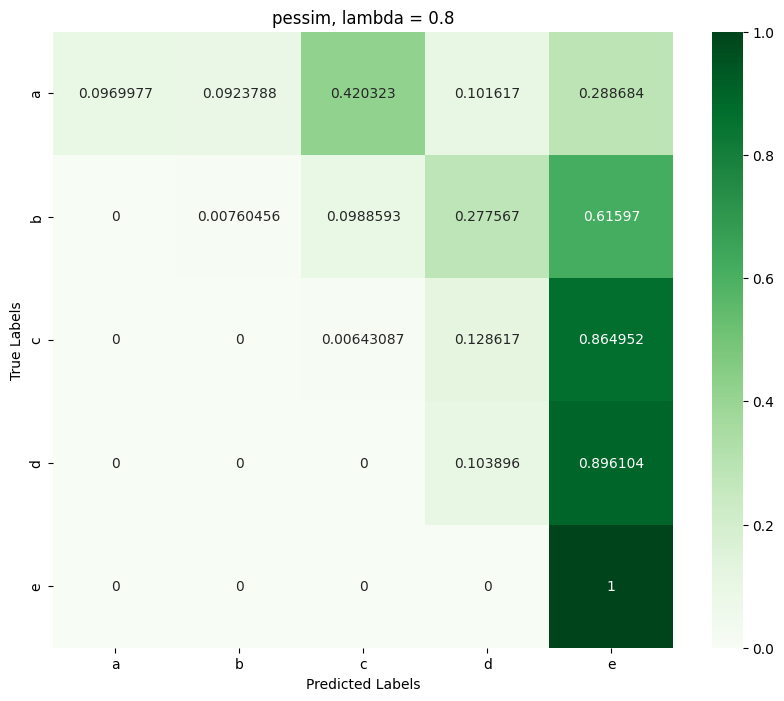

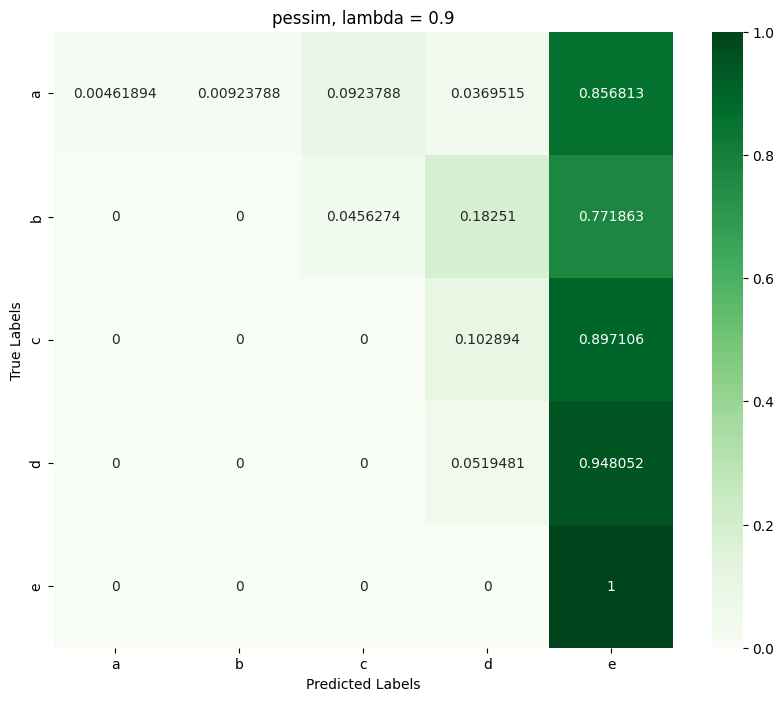

In [17]:
for y_pred in ys_pred:
    plt.figure(figsize = (10,8))
    cm = confusion_matrix(df[y_true], df[y_pred], labels=labels, normalize='true')
    # cm = rounding(cm)
    sns.heatmap(cm, annot = True, xticklabels = labels, yticklabels = labels, cmap = 'Greens', fmt='g')
    plt.title(y_pred.split("_")[0]+', lambda = '+y_pred.split('=')[1])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.savefig(y_pred+'.png')

#### Improving the weights

In [30]:
# Tuning the weights of the criterias
lmd = 0.4
weights = {
"energy_100g":1.25, "sugars_100g":1.25, "saturated-fat_100g":1.25, "salt_100g": 1.25, 
"proteins_100g":1, "fiber_100g": 1, "fruits-vegetables-nuts_100g":1}
df = PessimisticmajoritySorting(df, lmd, weights=weights)

y_true = 'nutriscore_grade'
y_pred = 'pessim_electre_lmd=0.4'
print('accuracy', round(accuracy_score(df[y_true], df[y_pred]),3))
print('precision', round(precision_score(df[y_true], df[y_pred], average='macro'),3))
print('recall', round(recall_score(df[y_true], df[y_pred], average='macro'),3))

accuracy 0.565
precision 0.524
recall 0.521


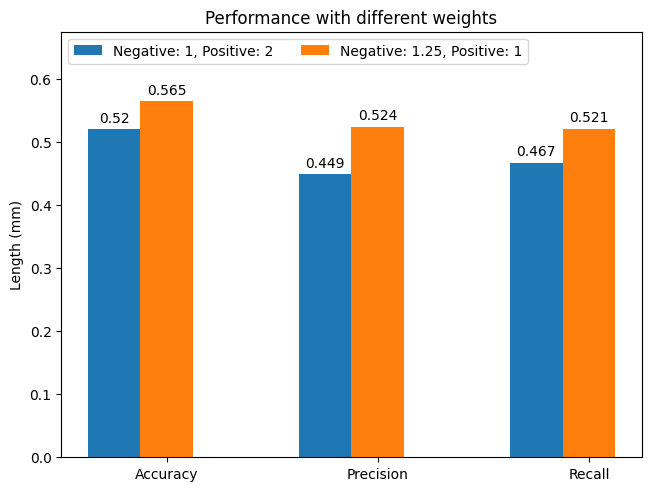

In [12]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Accuracy", "Precision", "Recall")
penguin_means = {
    'Negative: 1, Positive: 2': (0.52, 0.449, 0.467),
    'Negative: 1.25, Positive: 1': (0.565, 0.524, 0.521)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Performance with different weights')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.675)

plt.show()